In [ ]:
import h5py
import shutil
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations
from scipy.stats import kurtosis

# make sure the result quantities make sense

In [1]:
from modules.makeParams import *
from modules.RejectionProtocols import *
from modules.postAnalysis import *

In [36]:
cd C:\Users\ddopp\source\repos\CGProjectpub

C:\Users\ddopp\source\repos\CGProjectpub


In [303]:
#check the number tested according to voltage traces and parameter shapes:
archivedPathNotAVG = os.path.join("..","CGresults","notAVG")
localPath = os.getcwd()

LV1in = np.array(pd.read_pickle(os.path.join(archivedPathNotAVG,"output","LV3","VsomaControl.pkl")))
LV3in = np.array(pd.read_pickle(os.path.join(archivedPathNotAVG,"output","LV3","passParamsRepeat.pkl"))
LV2in = np.array(pd.read_pickle(os.path.join(archivedPathNotAVG,"output","LV3","input","LV2", "passParamsRepeat.pkl"))
LV2out = np.array(pd.read_pickle(r'C:\Users\ddopp\source\repos\CGresults\notAVG\output\LV2\passParams.pkl'))
LV3 = np.array(pd.read_pickle(r'C:\Users\ddopp\source\repos\CGresults\notAVG\output\LV3\VsomaControl.pkl'))


In [378]:
LV1numTested = (LV1in.shape)[0]
LV1passing = (LV2in.shape)[0]/16 
LV2passing = (LV2out.shape)[1]
LV3numTested = (LV3.shape)[0]/16/5

LV3passParamsAVG = np.array(pd.read_pickle(os.path.join("output","LV3","passParamsRepeat.pkl")))
codedAVG = np.loadtxt(os.path.join("output","LV3","LV3RejectionResults.txt"))
passIdxsAVG,failIdxsAVG,allIdxsAVG = getPassIdxs(codedAVG)
passParamsAVG = getEveryFirstNet(LV3passParamsAVG[:,passIdxsAVG])

LV3passParamsOG = np.array(pd.read_pickle(r'C:\Users\ddopp\source\repos\CGresults\notAVG\output\LV3\passParamsRepeat.pkl'))#the set used to make the average params
coded = np.loadtxt(r'C:\Users\ddopp\source\repos\CGresults\notAVG\output\LV3\LV3RejectionResults.txt')
passIdxs,failIdxs,allIdxs = getPassIdxs(coded)
passParams = getEveryFirstNet(LV3passParamsOG[:,passIdxs])


LV2numTested = (LV2in.shape)[1]/16
LV3AVGdpassed = (passParamsAVG.shape)[1]/5
LV3inputnum = (LV3in.shape)[1]
print('starting with %d cells, %d passed LV1\n%d cells passed LV2 which forms %d networks\nof which %d networks passed  ' %(10000,LV2numTested,LV2passing,LV2passing/5,(passParams.shape)[1]/5))
print('from the %d networks, an averaged network was formed for each, of which %d passed' %((passParams.shape)[1]/5,(passParamsAVG.shape)[1]/5))

starting with 10000 cells, 5751 passed LV1
3502 cells passed LV2 which forms 700 networks
of which 278 networks passed  
from the 278 networks, an averaged network was formed for each, of which 13 passed


In [58]:
print('according to parameter file dimensions:')
LV2inputparams = np.array(pd.read_pickle(os.path.join("input","LV2","passParamsRepeat"  + ".pkl")))
LV2outputparams = np.array(pd.read_pickle(os.path.join("output","LV2","passParamsRepeatControl"  + ".pkl")))
LV3inparams = np.array(pd.read_pickle(os.path.join("input","LV3","passParamsRepeat"  + ".pkl")))
LV3outparamspassing = np.array(pd.read_pickle(os.path.join("output","LV3","passParams"  + ".pkl")))
LV3outparamsnonpassing = np.array(pd.read_pickle(os.path.join("output","LV3","nonpassingParams"  + ".pkl")))
print('%d parameters passed LV1 and will be input to LV2' %((LV2inputparams.shape)[1]/16))
print('%d parameters passed LV2 and will be input to LV3' %((LV2outputparams.shape)[1]/16))

according to parameter file dimensions:
5751 parameters passed LV1 and will be input to LV2
5751 parameters passed LV2 and will be input to LV3


In [44]:
passingParams = np.loadtxt("avgNets.txt")
pd.DataFrame(passingParams)

,0,1,2,3,4,5,6,7,8,9,...,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979
0,0.000062,0.000062,0.000063,0.000063,0.000064,0.000064,0.000064,0.000064,0.000065,0.000065,...,0.000196,0.000197,0.000197,0.000197,0.000198,0.000198,0.000198,0.000199,0.000199,0.000199
1,0.001442,0.001348,0.000849,0.000194,0.000640,0.001604,0.001034,0.000180,0.001571,0.001571,...,0.001234,0.001752,0.000716,0.000464,0.000385,0.000285,0.000391,0.001081,0.001081,0.000818
2,0.000976,0.002279,0.004224,0.005839,0.002933,0.005980,0.005169,0.003954,0.002854,0.002854,...,0.003685,0.003078,0.003171,0.004232,0.002769,0.003817,0.003887,0.001370,0.001370,0.001330
3,0.001924,0.001939,0.001818,0.001623,0.001158,0.001486,0.001426,0.001335,0.001231,0.001231,...,0.001005,0.001916,0.001138,0.001500,0.001274,0.001245,0.001302,0.001607,0.001607,0.001090
4,0.000926,0.000531,0.000638,0.001195,0.000876,0.000197,0.000570,0.001131,0.001176,0.001176,...,0.000992,0.000411,0.000492,0.000522,0.000874,0.000919,0.000919,0.000801,0.000801,0.000369
5,0.000484,0.000358,0.000250,0.000214,0.000220,0.000428,0.000309,0.000131,0.000209,0.000209,...,0.000289,0.000367,0.000274,0.000277,0.000421,0.000429,0.000444,0.000483,0.000483,0.000418
6,0.000068,0.000080,0.000102,0.000123,0.000073,0.000099,0.000108,0.000121,0.000078,0.000078,...,0.000125,0.000096,0.000078,0.000084,0.000078,0.000092,0.000106,0.000122,0.000122,0.000114
7,0.000310,0.000229,0.000204,0.000246,0.000256,0.000214,0.000243,0.000286,0.000256,0.000256,...,0.000306,0.000192,0.000278,0.000244,0.000285,0.000279,0.000262,0.000209,0.000209,0.000226
8,0.000143,0.000125,0.000096,0.000071,0.000135,0.000074,0.000079,0.000088,0.000125,0.000125,...,0.000146,0.000103,0.000117,0.000137,0.000135,0.000133,0.000135,0.000146,0.000146,0.000121
9,0.000237,0.000255,0.000221,0.000154,0.000093,0.000204,0.000257,0.000337,0.000240,0.000240,...,0.000310,0.000333,0.000218,0.000137,0.000316,0.000222,0.000194,0.000333,0.000333,0.000157


In [68]:
#verify from the rejection protocol that the numbers passed align

coded1, Raw1, Idxs1= LV1RejectionProtocol(LV1)# Rin,Tau, and Vrest coded, and Rin,Tau,Vrest values
coded2, Raw2, Idxs2,critList2 = LV2RejectionProtocol(LV2.T,LV2TEA.T )
coded3, Raw3, Idxs3,critList3 = LV3RejectionProtocol(LV3.T,LV3TEA.T )#

In [123]:
LV1passing = np.where(Idxs1 == 1)[0].shape[0]
LV2passing = np.where(Idxs2 == 1)[0].shape[0]
LV3passing = np.where(Idxs3 == 1)[0].shape[0]

b = len(Idxs2)
passingSets = np.array([1 if(np.any(Idxs2[i:i+16]==1)) else 0 for i in range(0,b,16)])
passNo = np.where(passingSets==1)[0].shape[0]
if (passNo % 5) != 0:
    passNo  = passNo - (passNo % 5)
LV2passing = passNo    

print("According to rejection protocols")
print("%d cells pass LV1" %(LV1passing))
print("%d cells pass LV2" %(LV2passing))
print("which is %d networks tested in LV3" %(passNo/5))

According to rejection protocols
5751 cells pass LV1
3500 cells pass LV2
which is 700 networks tested in LV3


### find the averaged networks and unaverage them

In [17]:
def getPassIdxs(codedArray):
    [a,b] = codedArray.shape
    netPass = np.array([1 if(np.all(codedArray[:,i:i+5]==1)) else 0 for i in range(0,b,5)])# mark 1 if all cells in a net passed
    singleNetPass = [1 if (np.any(netPass[i:i+16] == 1)) else 0 for i in range(0,len(netPass),16)]
    codedPassexpanded = np.repeat(singleNetPass,5*16)#since each set of 80 is actually just for 1 network
    passIdxs =  np.where(codedPassexpanded ==1)[0]
    failIdxs = np.where(codedPassexpanded !=1)[0]
    return passIdxs,failIdxs,codedPassexpanded

def getEveryFirstNet(array):
    if np.ndim(array) == 1:
        dummyarray = np.ones((len(array)))
        array = np.vstack((array,dummyarray))
        check=1
    else:
        check=0
    [a,b] = array.shape
    allNets = np.ones((a,1))
    for i in range(0,b,5*16):
        allNets = np.hstack((allNets,array[:,i:i+5]))
    if check ==1:
        return allNets[0,1:]
    return allNets[:,1:]

In [15]:
#get the averaged networks which pass
LV3passParamsAVG = np.array(pd.read_pickle(r"C:\Users\ddopp\source\repos\CGresults\AVG\output\LV3\passParamsRepeat.pkl"))
codedAVG = np.loadtxt(r"C:\Users\ddopp\source\repos\CGresults\AVG\output\LV3\LV3RejectionResults.txt")
passIdxsAVG,failIdxsAVG,allIdxsAVG = getPassIdxs(codedAVG)
passParamsAVG = getEveryFirstNet(LV3passParamsAVG[:,passIdxsAVG])


#get the nonaveraged networks which pass
LV3passParamsOG = np.array(pd.read_pickle(r'C:\Users\ddopp\source\repos\CGresults\notAVG\output\LV3\passParamsRepeat.pkl'))#the set used to make the average params
coded = np.loadtxt(r'C:\Users\ddopp\source\repos\CGresults\notAVG\output\LV3\LV3RejectionResults.txt')
passIdxs,failIdxs,allIdxs = getPassIdxs(coded)
passParams = getEveryFirstNet(LV3passParamsOG[:,passIdxs])

#get the averaged networks which fail
failParamsAVG = getEveryFirstNet(LV3passParamsAVG[:,failIdxsAVG])
#get the nonaveraged networks which fail
failParams = getEveryFirstNet(LV3passParamsOG[:,failIdxs])
#compare the ranges of the failing networks with the nonfailing networks

allIdxsAVG#this is the 1 or 0 for every network at every frequency, 22240 recordings that form 278 networks, 1 if passed, 0 if failed
allAVGnetspassIdxs = getEveryFirstNet(allIdxsAVG)#1390 forming 278 networks
p = np.where(allAVGnetspassIdxs==1)[0]#1285 forming 257 networks
f =  np.where(allAVGnetspassIdxs!=1)[0]#105 forming 21 networks
t1 = passParams[:,p]# un averaged networks corresponding to the averaged networks that pass
t2 = passParams[:,f] # un averaged networks corresponding to the averaged networks that fail

In [37]:
#given only 257 unique parameter sets in the apverage passing, 250 of the non averaged ones make very different corrs and much higher even though there is about the same
#number of networks, so this is not enough to account for the results of AVG. the weighted avg

(15, 1285)

In [139]:
passParamsAVG.shape

(15, 1285)

In [140]:
LV3passParamsAVG[:,passIdxsAVG].shape

(15, 20560)

In [146]:
passIdxsAVG[:80]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], dtype=int64)

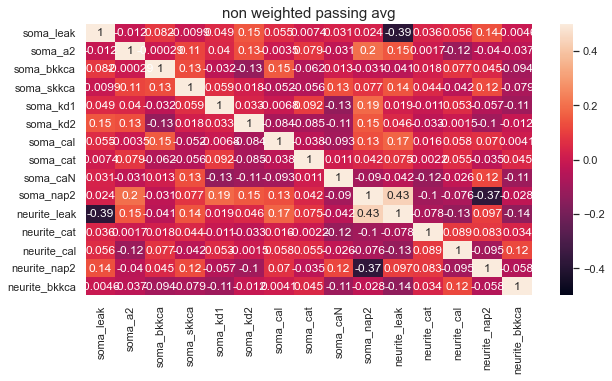

In [142]:
plotCorrelogram(passParamsAVG,fullParamsList(),'non weighted passing avg')
plt.show()

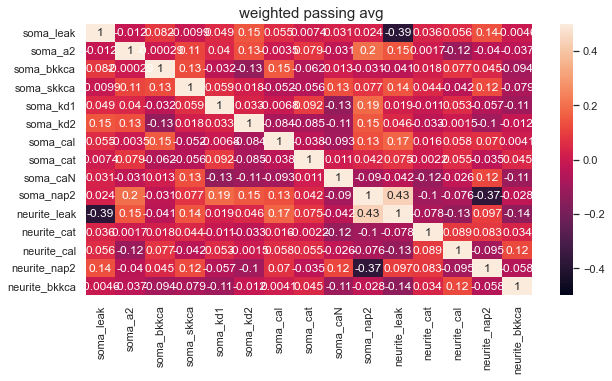

In [141]:
plotCorrelogram(LV3passParamsAVG[:,passIdxsAVG],fullParamsList(),' weighted passing avg')
plt.show()

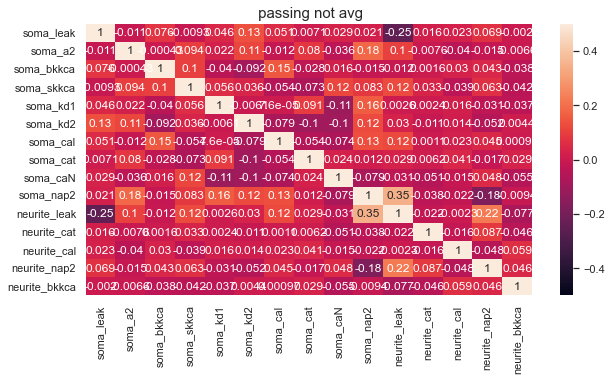

In [34]:
plotCorrelogram(t1,fullParamsList(),' passing not avg')
plt.show()

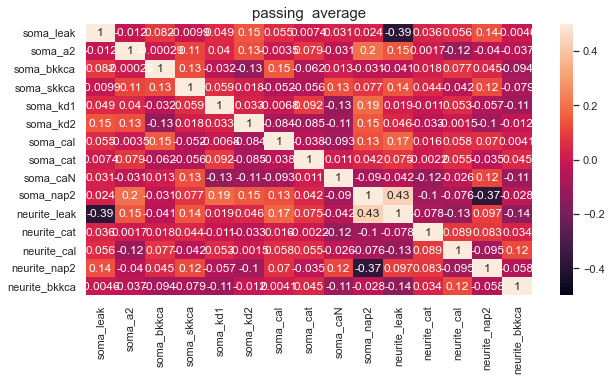

In [35]:
plotCorrelogram(passParamsAVG,fullParamsList(),'passing  average')
plt.show()

## kurtosis

In [809]:
from scipy.stats import skew
t1Kurts = [kurtosis(t1[i,:],bias=False) for i in range((t1.shape)[0])]
t1Kurts = np.round(t1Kurts,2)
t1Skews = [skew(t1[i,:]) for i in range((t1.shape)[0])]
t1Skews = np.round(t1Skews,2)

In [63]:
kurtosis(t1[10,:],bias=False)

-0.7536969321788538

In [62]:
kurtosis(t2[10,:],bias=False)

-0.9562672604290459

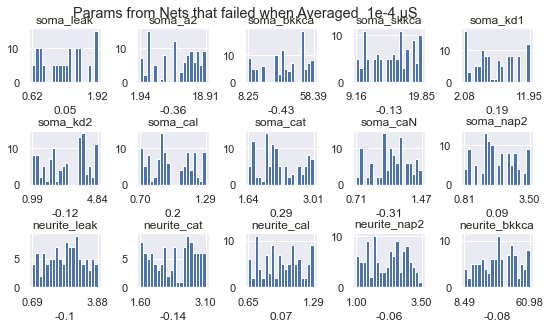

In [810]:
t2Kurts = [kurtosis(t2[i,:],bias=False) for i in range((t2.shape)[0])]
t2Kurts = np.round(t2Kurts,2)
t2Skews = [skew(t2[i,:]) for i in range((t2.shape)[0])]
t2Skews = np.round(t2Skews,2)
plotDistributions(t2,fullParamsList(),20,'Params from Nets that failed when Averaged  ',t2Skews)

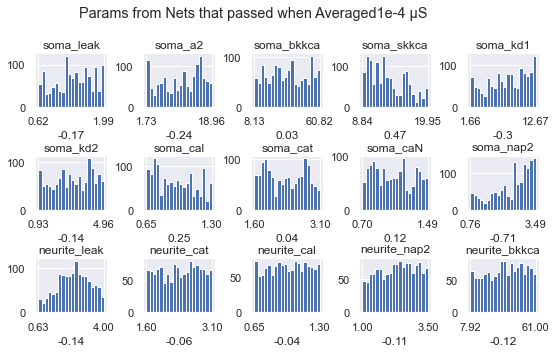

In [360]:
t1Kurts = [kurtosis(t1[i,:],bias=True) for i in range((t1.shape)[0])]
t1Kurts = np.round(t1Kurts,2)
t1Skews = [skew(t1[i,:]) for i in range((t1.shape)[0])]
t1Skews = np.round(t1Skews,2)

plotDistributions(t1,fullParamsList(),20,' Params from Nets that passed when Averaged',t1Skews)


In [345]:
np.mean(t1Kurts)

-1.0853333333333335

In [346]:
np.mean(t2Kurts)

-1.1179999999999999

In [347]:
np.std(t1Kurts)


0.1975809257550491

In [348]:
np.std(t2Kurts)

0.1804512861319272

In [351]:
stats.ttest_ind(t1Kurts, t2Kurts, equal_var=True)

Ttest_indResult(statistic=0.45678268381217996, pvalue=0.6513512516781614)

## weighted correlations

In [68]:
#get the averaged networks which pass
LV3passParamsAVG = np.array(pd.read_pickle(r"C:\Users\ddopp\source\repos\CGresults\AVG\output\LV3\passParamsRepeat.pkl"))
codedAVG = np.loadtxt(r"C:\Users\ddopp\source\repos\CGresults\AVG\output\LV3\LV3RejectionResults.txt")
[a,b] = codedAVG.shape
netPassAVGI = np.array([1 if(np.all(codedAVG[:,i:i+5]==1)) else 0 for i in range(0,b,5)])# mark 1 if all cells in a net passed
netPassAVGIdxs = np.repeat(netPassAVGI,5)#indices corresponding to the cells that pass so now we know at what frequency
netPassAVGIdxs = np.where(netPassAVGIdxs==1)[0]
#get the nonaveraged networks which pass
LV3passParamsOG = np.array(pd.read_pickle(r'C:\Users\ddopp\source\repos\CGresults\notAVG\output\LV3\passParamsRepeat.pkl'))#the set used to make the average params
coded = np.loadtxt(r'C:\Users\ddopp\source\repos\CGresults\notAVG\output\LV3\LV3RejectionResults.txt')
[a,b] = coded.shape
netPassOGI = np.array([1 if(np.all(coded[:,i:i+5]==1)) else 0 for i in range(0,b,5)])# mark 1 if all cells in a net passed
netPassOGIdxs = np.repeat(netPassOGI,5)
netPassOGIdxs = np.where(netPassOGIdxs==1)[0]

In [134]:
LV3passParamAVGnets = LV3passParamsAVG[:,netPassAVGIdxs]
LV3passParamAVGnets.shape

(15, 3000)

In [135]:
LV3passParamsOGnets = LV3passParamsOG[:,netPassOGIdxs]
LV3passParamsOGnets.shape

(15, 2735)

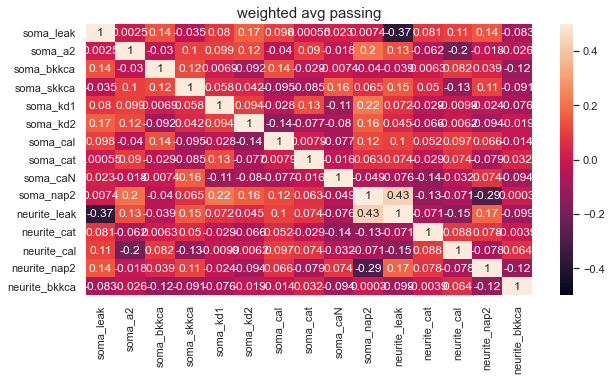

In [131]:
plotCorrelogram(LV3passParamAVGnets,fullParamsList(),'weighted avg passing')
plt.show()

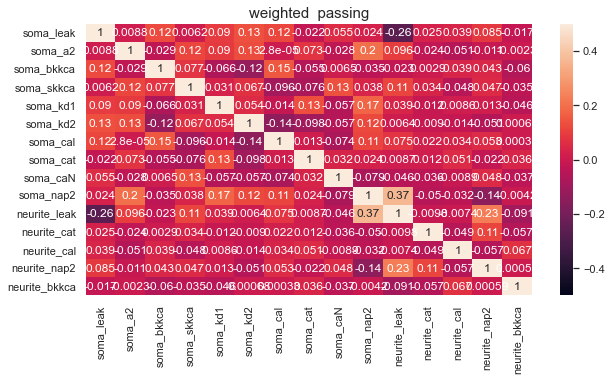

In [132]:
plotCorrelogram(LV3passParamsOGnets,fullParamsList(),'weighted  passing')
plt.show()

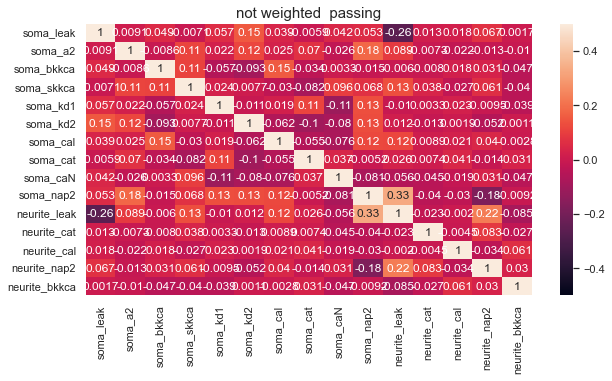

In [133]:
plotCorrelogram(passParams,fullParamsList(),'not weighted  passing')
plt.show()

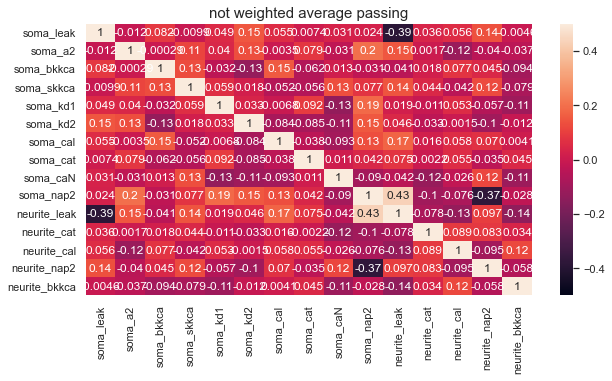

In [152]:
plotCorrelogram(passParamsAVG,fullParamsList(),'not weighted average passing')
plt.show()

# frequency and network ID

In [3]:
#get the averaged networks which pass
LV3passParamsAVG = np.array(pd.read_pickle(r"C:\Users\ddopp\source\repos\CGresults\AVG\output\LV3\passParamsRepeat.pkl"))
codedAVG = np.loadtxt(r"C:\Users\ddopp\source\repos\CGresults\AVG\output\LV3\LV3RejectionResults.txt")
[a,b] = codedAVG.shape
netPassAVGI = np.array([1 if(np.all(codedAVG[:,i:i+5]==1)) else 0 for i in range(0,b,5)])# mark 1 if all cells in a net passed
netPassAVGIdxs = np.repeat(netPassAVGI,5)#indices corresponding to the cells that pass so now we know at what frequency
netPassAVGIdxs = np.where(netPassAVGIdxs==1)[0]
#get the nonaveraged networks which pass
LV3passParamsOG = np.array(pd.read_pickle(r'C:\Users\ddopp\source\repos\CGresults\notAVG\output\LV3\passParamsRepeat.pkl'))#the set used to make the average params
coded = np.loadtxt(r'C:\Users\ddopp\source\repos\CGresults\notAVG\output\LV3\LV3RejectionResults.txt')
[a,b] = coded.shape
netPassOGI = np.array([1 if(np.all(coded[:,i:i+5]==1)) else 0 for i in range(0,b,5)])# mark 1 if all cells in a net passed#11200
netPassOGIdxs = np.repeat(netPassOGI,5)#repeat so that each index is the same for all the cells in a single network, back to 56000
netPassOGIdxs = np.where(netPassOGIdxs==1)[0]#find where in the array of 56000 passing+nonpassing where the whole network passes

netFailOGI = np.array([1 if(np.any(coded[:,i:i+5]!=1)) else 0 for i in range(0,b,5)])# mark 1 if all cells in a net passed
netFailOGIdxs = np.repeat(netFailOGI,5)#repeat so that each index is the same for all the cells in a single network, back to 56000
netFailOGIdxs = np.where(netFailOGIdxs==1)[0]#find where in the array of 56000 passing+nonpassing where the whole network passes

In [6]:
SCfreqs = np.arange(16,32)
SCfreqs = np.repeat(SCfreqs,5)
SCfreqsAVG = np.tile(SCfreqs,int(LV3passParamsAVG.shape[1]/5/16))#should be 56000, the number of recordings of the non averaged params before testing
freqsAVGpassing = SCfreqsAVG[netPassAVGIdxs]


SCfreqsnonavg = np.tile(SCfreqs,int(LV3passParamsOG.shape[1]/5/16))#should be 56000, the number of recordings of the non averaged params before testing
freqsnonavgpassing = SCfreqsnonavg[netPassOGIdxs]

freqsnonavgfailing = SCfreqsnonavg[netFailOGIdxs]
codedfailing = coded[:,netFailOGIdxs]

In [5]:
setIdxs = np.where((freqsnonavgfailing > 17)) and np.where(freqsnonavgfailing < 19)[0]
print(len(setIdxs))
plotFailCrit(codedfailing[:,setIdxs],LV3CritList())
plt.show()

9370


C:\Users\ddopp\AppData\Local\Temp\ipykernel_15844\1607353170.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


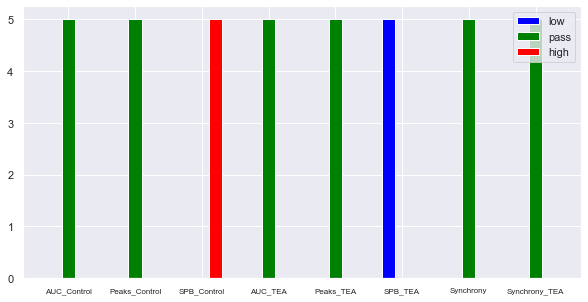

In [1290]:
ni = getNetIDX(656,17)
plotFailCrit(coded[:,ni:ni+5],LV3CritList())
plt.show()

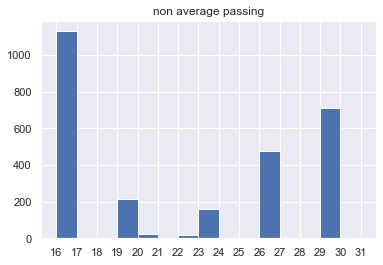

In [1274]:
counts, bins = np.histogram(freqsnonavgpassing,bins=np.arange(16,32))
plt.hist(freqsnonavgpassing,bins=bins, align='mid')
plt.xticks(np.arange(16,32),np.arange(16,32))
plt.title('non average passing')
plt.savefig('non average passing')

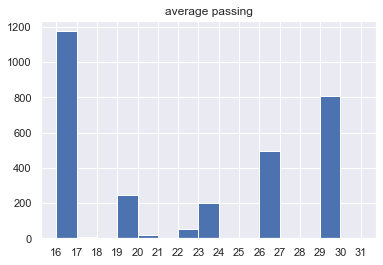

In [1275]:
counts, bins = np.histogram(freqsAVGpassing,bins=np.arange(16,32))
plt.hist(freqsAVGpassing,bins=bins, align='mid')
plt.xticks(np.arange(16,32),np.arange(16,32))
plt.title('average passing')
plt.savefig('average passing')

### raster plot of frequencies that cells pass

In [19]:
def getPassingCellIdxsLV3(params,coded):
    [a,b] = codedAVG.shape
    netPassAVGI = np.array([1 if(np.all(codedAVG[:,i:i+5]==1)) else 0 for i in range(0,b,5)])# mark 1 if all cells in a net passed
    netPassAVGIdxs = np.repeat(netPassAVGI,5)#indices corresponding to the cells that pass so now we know at what frequency
    netPassAVGIdxs = np.where(netPassAVGIdxs==1)[0]
    return netPassAVGIdxs

In [6]:
SCfreqs = np.arange(16,32)
SCfreqs = np.repeat(SCfreqs,5)
SCfreqsAVG = np.tile(SCfreqs,int(LV3passParamsAVG.shape[1]/5/16))#should be 56000, the number of recordings of the non averaged params before testing
freqsAVGpassing = SCfreqsAVG[netPassAVGIdxs]


SCfreqsnonavg = np.tile(SCfreqs,int(LV3passParamsOG.shape[1]/5/16))#should be 56000, the number of recordings of the non averaged params before testing
freqsnonavgpassing = SCfreqsnonavg[netPassOGIdxs]

In [18]:
def getPassingFreqs(params,coded):
    netPassIdxs = getPassingCellIdxsLV3(params,coded)
    SCfreqs = np.arange(16,32)
    SCfreqs = np.repeat(SCfreqs,5)
    SCfreqs = np.tile(SCfreqs,int(params.shape[1]/5/16))#should be 56000, the number of recordings of the non averaged params before testing
    freqspassing = SCfreqs[netPassAVGIdxs]
    return freqspassing

In [7]:
LV3passParamsOG = np.array(pd.read_pickle(r'C:\Users\ddopp\source\repos\CGresults\notAVG\output\LV3\passParamsRepeat.pkl'))#the set used to make the average params
coded = np.loadtxt(r'C:\Users\ddopp\source\repos\CGresults\notAVG\output\LV3\LV3RejectionResults.txt')

SCfreqsnonavg = getPassingFreqs(LV3passParamsOG,coded)

[a,b] = coded.shape
cellids = np.arange(0,int((coded.shape)[1]/5/16))
netids = np.repeat(cellids,5*16)
codedwNets = np.vstack((coded,netids))
passnetIDs =np.array([int(codedwNets[a,i]) if (np.all(codedwNets[:a,i:i+5]==1)) else -1 for i in range(0,b,5)])#list of cellids of passing nets, 5x less than all traces 56000
passnetIDs = np.repeat(passnetIDs,5)#back to 56000
passnetIDXs = passnetIDs[np.where(passnetIDs != -1)[0]]#just the passing idxs from the original 56000
passFreq = SCfreqsnonavg[passnetIDXs]



In [171]:
def rasterData(coded):
    [a,b] = coded.shape
    cellids = np.arange(0,int((coded.shape)[1]/5/16))
    netids = np.repeat(cellids,5*16)
    codedwNets = np.vstack((coded,netids))
    passnetIDs =np.array([int(codedwNets[a,i]) if (np.all(codedwNets[:a,i:i+5]==1)) else -1 for i in range(0,b,5)])#list of cellids of passing nets, 5x less than all traces 56000
    passnetIDs = np.repeat(passnetIDs,5)#back to 56000
    passnetIDXs = passnetIDs[np.where(passnetIDs != -1)[0]]#just the passing idxs from the original 56000
    passFreq = SCfreqsnonavg[passnetIDXs]
    return passnetIDs,passnetIDXs

In [12]:
def plotRaster(mappedIdxs,freqsnonavgpassing,filename = 'cellIdsfreq.png'):

    allIds = []
    for i in range(0,len(mappedIdxs),5):
        if np.all(mappedIdxs[i:i+10] == mappedIdxs[i]):
            allIds.append(mappedIdxs[i])
    allIds = np.array(allIds)
    allIds = np.unique(allIds)


    fig, ax = plt.subplots(figsize=(30,6))
    plt.scatter(mappedIdxs,freqsnonavgpassing,s=2)


    ax.set_yticks(np.arange(16,32))
    ax.set_xticks(allIds,allIds,fontsize = 8,rotation = 90)


    axin1 = ax.inset_axes([0.2,-0.012,0,0.95])
    axin1.set_yticks(np.arange(2,34,2),np.arange(16,32),fontsize =9)
    axin1.set_xticks([])


    axin2 = ax.inset_axes([0.4,-0.012,0,0.95])
    axin2.set_yticks(np.arange(2,34,2),np.arange(16,32),fontsize =9)
    axin2.set_xticks([])

    axin3 = ax.inset_axes([0.6,-0.012,0,0.95])
    axin3.set_yticks(np.arange(2,34,2),np.arange(16,32),fontsize =9)
    axin3.set_xticks([])


    axin4 = ax.inset_axes([0.8,-0.012,0,0.95])
    axin4.set_yticks(np.arange(2,34,2),np.arange(16,32),fontsize =9)
    axin4.set_xticks([])

    plt.vlines(allIds,ymax=31,ymin=16,color = 'red',linewidths=0.3)
    plt.xlabel('network ID')
    plt.ylabel('SCfreq')
    plt.savefig(filename,dpi = 500)
    print('file saved as %s' %(filename))

In [8]:
#recode
#except for case 1, if the passnetIDX is not different from the previous number, the next idx in the new list is the same value of the iteration variable
mappedIdxs = np.array([0])
ogIDxs = []
j=0
for i in range(len(passnetIDXs)-1):
    
    if passnetIDXs[i] == passnetIDXs[i+1]:
        mappedIdxs = np.append(mappedIdxs,j)
        ogIDxs.append(passnetIDXs[i])
    else:
        mappedIdxs = np.append(mappedIdxs,j)
        ogIDxs.append(passnetIDXs[i])
        j+=1
mappedIdxs = mappedIdxs[1:]#remove the first item since it is just to get the array started
mappedIdxs = np.append(mappedIdxs,mappedIdxs[i])#repeat the last item since we have to stop early
ogIDxs.append(ogIDxs[len(ogIDxs)-1])

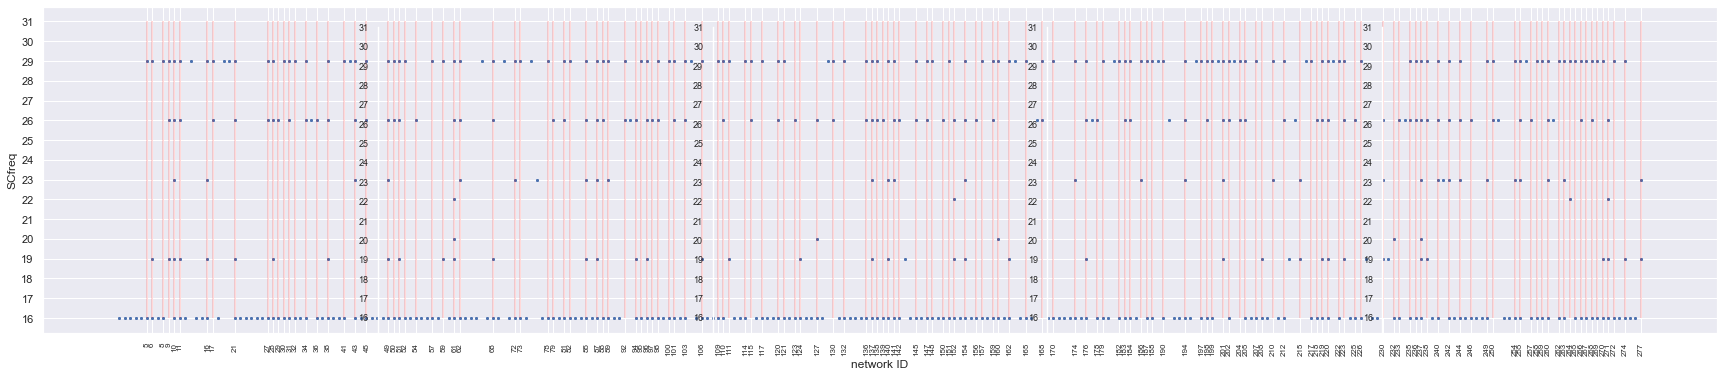

In [9]:
allIds = []
for i in range(0,len(mappedIdxs),5):
    if np.all(mappedIdxs[i:i+10] == mappedIdxs[i]):
        allIds.append(mappedIdxs[i])
allIds = np.array(allIds)
allIds = np.unique(allIds)


fig, ax = plt.subplots(figsize=(30,6))
plt.scatter(mappedIdxs,freqsnonavgpassing,s=2)


ax.set_yticks(np.arange(16,32))
ax.set_xticks(allIds,allIds,fontsize = 8,rotation = 90)


axin1 = ax.inset_axes([0.2,-0.012,0,0.95])
axin1.set_yticks(np.arange(2,34,2),np.arange(16,32),fontsize =9)
axin1.set_xticks([])


axin2 = ax.inset_axes([0.4,-0.012,0,0.95])
axin2.set_yticks(np.arange(2,34,2),np.arange(16,32),fontsize =9)
axin2.set_xticks([])

axin3 = ax.inset_axes([0.6,-0.012,0,0.95])
axin3.set_yticks(np.arange(2,34,2),np.arange(16,32),fontsize =9)
axin3.set_xticks([])


axin4 = ax.inset_axes([0.8,-0.012,0,0.95])
axin4.set_yticks(np.arange(2,34,2),np.arange(16,32),fontsize =9)
axin4.set_xticks([])

plt.vlines(allIds,ymax=31,ymin=16,color = 'red',linewidths=0.3)
plt.xlabel('network ID')
plt.ylabel('SCfreq')
plt.savefig('cellIdsfreq.png',dpi = 500)

## find and plot the network in the original data from the network id in the raster

In [88]:
coded = np.loadtxt(r'C:\Users\ddopp\source\repos\CGresults\notAVG\output\LV3\LV3RejectionResults.txt')
passnetIDs,passnetIDXs = getpassingNetIDXs(coded)
mappedIDxs,ogIDxs = mapping(passnetIDXs)
unMap(mappedIDxs,ogIDxs,passnetIDs,27)

65

In [244]:
Trials = LV2Params.shape[1]
LVL = 'LV3'
seed = 222
SCfreqs = []
bufferSize = 50
np.random.seed(int(seed))
for j in range(0,int(Trials/16/5)):
    for i in range(0,16):
        SCfreqs.append(np.random.uniform(15.5+i,16.5+i))
if LVL == 'LV3':
    SCfreqs = np.repeat(SCfreqs,5)


In [238]:
All = []
for j in range(0,int(Trials/16)):
    for i in range(0,16):
        freq = SCfreqs[(j*16)+i]*0.6
        spikeNo = math.ceil(freq*.300)#the frequency for the 300 ms beginning
        firstPart = np.linspace(300,600,spikeNo)

        freq = SCfreqs[(j*16)+i]*0.9
        spikeNo = math.ceil(freq*0.600)#the freq for the 600 ms middle
        secondPart = np.linspace(600,1200,spikeNo)
        secondSpace = math.floor(secondPart[3] - secondPart[2])#we want the first event of the middle of the burst to be the same distance from the last spike of the first time..
        secondPart = np.linspace(firstPart[len(firstPart)-1]+secondSpace ,1200,spikeNo)#..so the spikes remain relatively even

        freq = SCfreqs[(j*16)+i]*0.4
        spikeNo = math.ceil(freq*.100)#freq for the 100 ms end 
        thirdPart = np.linspace(1200,1300,spikeNo)
        thirdSpace = math.floor(secondPart[len(secondPart)-1] - secondPart[len(secondPart)-2])
        thirdPart = np.linspace(secondPart[len(secondPart)-1] + thirdSpace,1200,spikeNo)
        

        args = [firstPart,secondPart,thirdPart,np.zeros((bufferSize-(len(firstPart)+ len(secondPart) + len(thirdPart))))]
        All.append(np.concatenate(args,axis=0))

All = np.array(All,dtype=object)

In [4]:
VsomaControl = np.array(pd.read_pickle(r"C:\Users\ddopp\source\repos\CGresults\notAVG\output\LV3\VsomaControl.pkl")).T
VsomaTEA = np.array(pd.read_pickle(r"C:\Users\ddopp\source\repos\CGresults\notAVG\output\LV3\VsomaTEA.pkl")).T

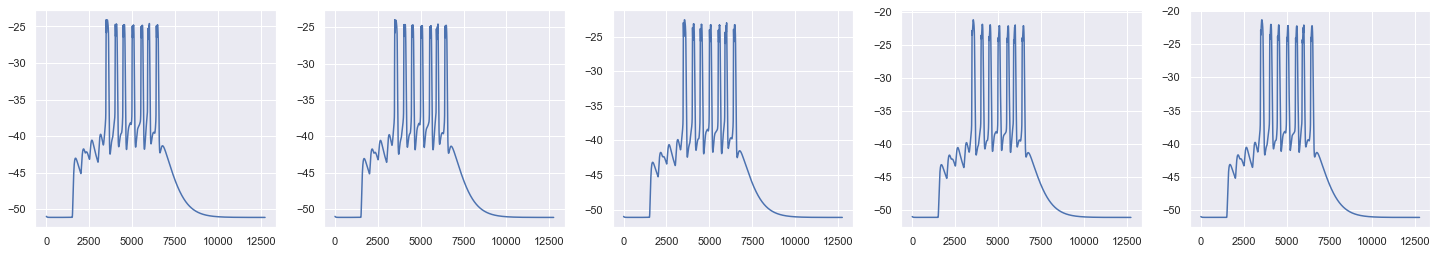

In [156]:

plotNet(VsomaControl,OGneworkID,16)
plt.show()

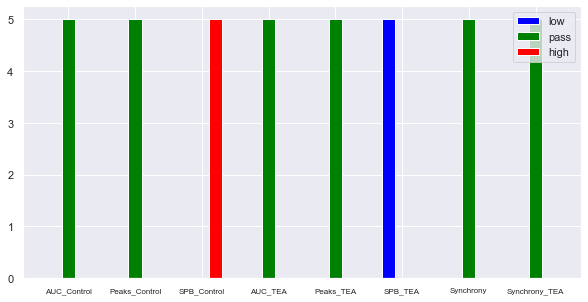

In [153]:
plotFailCrit(coded[:,OGneworkID*80+10:OGneworkID*80+15],LV3CritList())
plt.show()

### development

In [67]:
#plot boxplots of all parameters of interest for passing or nonpassing cells

In [85]:
def getStats(paramsDF,failCriteriaRaw,failCriteriacoded,passing):#unused
    
    [a,b] = failCriteriacoded.shape
    if passing == 'passing':
        IDXs = np.where(failCriteriacoded[a-1,:]==1)[0]
    elif passing == 'low':
        IDXs = np.where(failCriteriacoded[a-1,:]<1)[0]
    elif passing == 'high':
        IDXs = np.where(failCriteriacoded[a-1,:] > 1)[0]
    
    selected_df = pd.DataFrame([paramsDF[key][IDXs] for key in paramsDF]).T
        

In [86]:
def summaryStats(selecteddf,pair):   
    
    AVG = np.mean(selecteddf[pair[0]])
    STD = np.std(selecteddf[pair[0]])
    #Skew = stats.skew(selecteddf)
   # Kurt = stats.kurtosis(selecteddf, fisher=True)
    retDict = {'parameter' : pair[0],
               'rCriteria': pair[1],
               'AVG' : AVG,
               'STD': STD,
               #'Skew' : Skew,
               #'Kurt' : Kurt
              }
    return retDict

In [87]:
def tTest(passDf,failDf,pair):
    eqVar = True
    if abs(np.std(passDf[pair[0]]) - np.std(passDf[pair[1]]) ) < abs(np.std(passDf[pair[0]]))/ 2:
        eqVar = False
    return stats.ttest_ind(passDf[pair[0]], failDf[pair[0]], equal_var=eqVar)

In [88]:

rejectionResultsRaw = np.loadtxt(os.path.join("output","LV3","LV3RejectionRaw.txt"))
rejectionResults = np.loadtxt(os.path.join("output","LV3","LV3RejectionResults.txt"))
params = np.array(pd.read_pickle(os.path.join("output","LV3","passParamsRepeat"  + ".pkl")))

In [89]:
[a,b] = rejectionResults.shape
passIDXs = np.where(rejectionResults[a-1,:]==1)[0]
failLowIDXs = np.where(rejectionResults[a-1,:]<1)[0]
failHighIDXs = np.where(rejectionResults[a-1,:] > 1)[0]
#concat params with rejection results data, and make a df with the columns as variables
paramsDF = pd.DataFrame(np.vstack((params,rejectionResultsRaw)).T,columns = fullParamsList() + LV3CritList())
# get only the passing parameters into a dataframe keeping columns as variables
passParamsDF = pd.DataFrame([paramsDF[key][passIDXs] for key in paramsDF]).T
flParamsDF = pd.DataFrame([paramsDF[key][failLowIDXs] for key in paramsDF]).T

In [7]:
# get the df with pass or fail idxs, get a list of the pass pairs and for each pair, get sum stats. print(this is the mean for passpair 0  that passed)

In [90]:
#get a df of the correlogram but with only the correlations between intrinsic parameters and rejection criteria that are above 0.2
dfCorr = passParamsDF.corr(method='pearson')
maskedDFCorr = np.array(dfCorr)
mask = (abs(dfCorr) > 0.2) & (abs(dfCorr < 1))
mask = np.array(mask)
for i in range(len(mask)):
    for j in range(len(mask)):
        if (i < len(fullParamsList())) & (j <len(fullParamsList())):
            maskedDFCorr[i][j] = np.nan

maskedDFCorr = pd.DataFrame(maskedDFCorr)
maskedDFCorr = maskedDFCorr[pd.DataFrame(mask)]
maskedDFCorr.columns = fullParamsList() + LV3CritList()
maskedDFCorr.index = fullParamsList() + LV3CritList()

In [91]:
#get a list of the pairs of parameters and rejection criteria that are above 0.2
passpairs = []
for param1 in maskedDFCorr:
    for i in range(len(maskedDFCorr[param1])):
        if not np.isnan(maskedDFCorr[param1][i]):
            passpairs.append((param1,(maskedDFCorr.keys())[i]))
passpairs = list(set(passpairs))
pairList = []
for pair in passpairs:
    if pair[0] in fullParamsList():       
        pairList.append(pair)

In [92]:
failCriteriacoded = pd.DataFrame(rejectionResults).T
failCriteriacoded.columns = LV3CritList() + ['passorfail']

In [96]:
def makestatsDict(paramsDF,failCriteriacoded,pairList,passing):
    
    allStats = []
    for i in range(len(pairList)):
        passIDXs = failCriteriacoded[pairList[i][1]] == 1
        lowIDXs = failCriteriacoded[pairList[i][1]] < 1
        highIDXs = failCriteriacoded[pairList[i][1]] > 1

        passdf = pd.DataFrame([paramsDF[key][passIDXs] for key in paramsDF]).T
        lowdf = pd.DataFrame([paramsDF[key][lowIDXs] for key in paramsDF]).T
        highdf = pd.DataFrame([paramsDF[key][highIDXs] for key in paramsDF]).T
        

        if passing == 'passing':
            statsDict = summaryStats(passdf,pairList[i])
            lowtest = tTest(passdf,lowdf,pairList[i])
            hightest = tTest(passdf,highdf,pairList[i])
            statsDict.update({'fail low p-value':lowtest[1]})
            statsDict.update({'fail high p-value': hightest[1]})
        elif passing == 'low':
            statsDict = summaryStats(lowdf,pairList[i])
        elif passing == 'high':
            statsDict = summaryStats(highdf,pairList[i])
        allStats.append(statsDict)
    allStats = pd.DataFrame(allStats)
    return allStats

In [97]:
lowDict = makestatsDict(paramsDF,failCriteriacoded,pairList,'low')
passDict = makestatsDict(paramsDF,failCriteriacoded,pairList,'passing')
highDict = makestatsDict(paramsDF,failCriteriacoded,pairList,'high')
passDict.columns = ['parameter','rCriteria','AVG_passing','STD_passing','fail low p-value','fail high p-value']
lowDict.columns = ['parameter','rCriteria','AVG_Low','STD_Low']
highDict.columns = ['parameter','rCriteria','AVG_High','STD_High']
allDF = pd.merge(passDict,lowDict)
allDF = pd.merge(allDF,highDict)
allDF = allDF[['parameter','rCriteria','AVG_passing','STD_passing','AVG_Low','STD_Low','AVG_High','STD_High','fail low p-value','fail high p-value']]

In [ ]:
lowDict = makestatsDict(t2,failCriteriacoded,pairList,'low')
passDict = makestatsDict(t2,failCriteriacoded,pairList,'passing')
highDict = makestatsDict(t2,failCriteriacoded,pairList,'high')
passDict.columns = ['parameter','rCriteria','AVG_passing','STD_passing','fail low p-value','fail high p-value']
lowDict.columns = ['parameter','rCriteria','AVG_Low','STD_Low']
highDict.columns = ['parameter','rCriteria','AVG_High','STD_High']
allDF = pd.merge(passDict,lowDict)
allDF = pd.merge(allDF,highDict)
allDF = allDF[['parameter','rCriteria','AVG_passing','STD_passing','AVG_Low','STD_Low','AVG_High','STD_High','fail low p-value','fail high p-value']]

In [98]:
allDF

,parameter,rCriteria,AVG_passing,STD_passing,AVG_Low,STD_Low,AVG_High,STD_High,fail low p-value,fail high p-value
0,soma_leak,AUC_TEA,0.000135,0.000038,0.000121,0.000048,NaN,NaN,1.904146e-12,NaN
1,soma_cal,Synchrony_TEA,0.000094,0.000018,NaN,NaN,0.000095,0.000015,NaN,5.861219e-01
2,soma_cal,Peaks_TEA,0.000094,0.000017,0.000106,0.000012,NaN,NaN,1.674235e-07,NaN
3,soma_skkca,AUC_TEA,0.001327,0.000284,0.001678,0.000179,NaN,NaN,2.860185e-134,NaN
4,soma_bkkca,AUC_Control,0.003528,0.001403,NaN,NaN,0.002154,0.001407,NaN,8.906557e-104
5,neurite_leak,AUC_TEA,0.000243,0.000052,0.000298,0.000046,NaN,NaN,4.314823e-103,NaN
6,soma_leak,Peaks_Control,0.000135,0.000039,NaN,NaN,NaN,NaN,NaN,NaN
7,soma_skkca,SPB_TEA,0.001268,0.000280,0.001353,0.000285,NaN,NaN,1.763668e-76,NaN
8,soma_leak,Synchrony,0.000135,0.000039,NaN,NaN,NaN,NaN,NaN,NaN
9,neurite_leak,Peaks_Control,0.000244,0.000052,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
allDF.to_csv('rejectionStatsAVG.csv')

In [4]:

rejectionResultsRaw = np.loadtxt(os.path.join("output","LV3","LV3RejectionRaw.txt"))
rejectionResults = np.loadtxt(os.path.join("output","LV3","LV3RejectionResults.txt"))
params = np.array(pd.read_pickle(os.path.join("output","LV3","passParamsRepeat"  + ".pkl")))

#concat params with rejection results data, and make a df with the columns as variables
paramsDF = pd.DataFrame(np.vstack((params,rejectionResultsRaw)).T,columns = fullParamsList() + LV3CritList())

[a,b] = rejectionResults.shape
passIDXs = np.where(rejectionResults[a-1,:]==1)[0]
passParamsDF = pd.DataFrame([paramsDF[key][passIDXs] for key in paramsDF]).T
maskedDFCorr = getMaskedCorr(passParamsDF,0.2)#passParams,Pearson's R threshold to consider above

pairList = getpassPairsList(maskedDFCorr)

failCriteriacoded = pd.DataFrame(rejectionResults).T
failCriteriacoded.columns = LV3CritList() + ['passorfail']

lowDict = makestatsDict(paramsDF,failCriteriacoded,pairList,'low')
passDict = makestatsDict(paramsDF,failCriteriacoded,pairList,'passing')
highDict = makestatsDict(paramsDF,failCriteriacoded,pairList,'high')
passDict.columns = ['parameter','rCriteria','AVG_passing','STD_passing','fail low p-value','fail high p-value']
lowDict.columns = ['parameter','rCriteria','AVG_Low','STD_Low']
highDict.columns = ['parameter','rCriteria','AVG_High','STD_High']
allDF = pd.merge(passDict,lowDict)
allDF = pd.merge(allDF,highDict)
allDF = allDF[['parameter','rCriteria','AVG_passing','STD_passing','AVG_Low','STD_Low','AVG_High','STD_High','fail low p-value','fail high p-value']]

In [5]:
allDF

,parameter,rCriteria,AVG_passing,STD_passing,AVG_Low,STD_Low,AVG_High,STD_High,fail low p-value,fail high p-value
0,neurite_leak,AUC_Control,0.000245,0.000052,NaN,NaN,0.000198,0.000045,NaN,2.301875e-89
1,neurite_leak,Peaks_Control,0.000244,0.000052,NaN,NaN,NaN,NaN,NaN,NaN
2,soma_nap2,Synchrony,0.000249,0.000071,NaN,NaN,NaN,NaN,NaN,NaN
3,soma_leak,AUC_Control,0.000135,0.000038,NaN,NaN,0.000109,0.000039,NaN,4.970935e-52
4,soma_leak,Peaks_Control,0.000135,0.000039,NaN,NaN,NaN,NaN,NaN,NaN
5,neurite_leak,Synchrony,0.000244,0.000052,NaN,NaN,NaN,NaN,NaN,NaN
6,soma_skkca,SPB_TEA,0.001268,0.000280,0.001353,0.000285,NaN,NaN,1.763668e-76,NaN
7,soma_skkca,AUC_TEA,0.001327,0.000284,0.001678,0.000179,NaN,NaN,2.860185e-134,NaN
8,soma_bkkca,AUC_Control,0.003528,0.001403,NaN,NaN,0.002154,0.001407,NaN,8.906557e-104
9,soma_leak,Synchrony,0.000135,0.000039,NaN,NaN,NaN,NaN,NaN,NaN


523


Text(0.5, 1.0, '16 HZ')

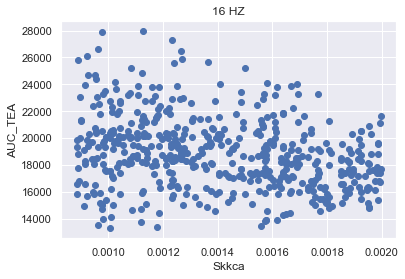

In [59]:
#get at just one frequency
freq = 16

freqIDXS = np.arange(freq-16,(params.shape)[1],step=80)
finalIDXS = np.array([0])



[a,b] = rejectionCrit.shape
passingIDXS = np.where(rejectionCrit[a-1,:] == 1)[0]
#for i in range(len(freqIDXS)):
#    if freqIDXS[i] in passingIDXS:
#        finalIDXS = np.append(finalIDXS,freqIDXS[i])
 
for i in range(len(passingIDXS)):
    if passingIDXS[i] in freqIDXS:
        finalIDXS = np.append(finalIDXS,passingIDXS[i])

print(len(finalIDXS))
# skkca vs rejection criteria
AUC_TEA = rejectionResults[3,finalIDXS]
Skkca = params[3,finalIDXS]
plt.scatter(Skkca,AUC_TEA)
plt.xlabel('Skkca')
plt.ylabel('AUC_TEA')
plt.title('%d HZ' %(freq))

In [ ]:
def passingatFreq(params, rejectionCrit,freq):
    [a,b] = rejectionCrit.shape
    passingIDXS = np.where(rejectionCrit[a-1,:] == 1)[0]
    
    freqIDXS = np.arange(freq-16,(params.shape)[1],step=80)
    finalIDXS = np.array([0])
    for i in range(len(freqIDXS)):
        if freqIDXS[i] in passingIDXS:
            finalIDXS = np.append(finalIDXS,freqIDXS[i])
    return np.delete(finalIDXS,0)

Text(0.5, 0, 'SCFreq')

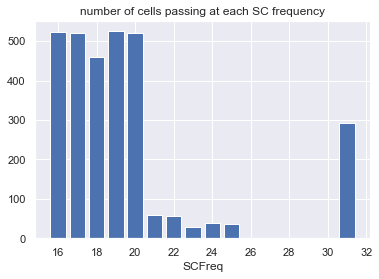

In [177]:
plt.bar(np.arange(16,32),height = passNo)
plt.title('number of cells passing at each SC frequency')
plt.xlabel('SCFreq')

# debugging

In [66]:
def makeAvgNets(LV3passParams):#LV3passParamsRepeat in the LV3 output folder is the file that has the parameters of the networks repeated 16 times each
    [a,b] = LV3passParams.shape

    avgNets = np.ones((a,1))

    for i in range(0,b,5*16):
        avgNets = np.hstack((avgNets,np.mean(LV3passParams[:,i:i+5],axis=1).reshape(-1,1)))
    avgNets = avgNets[:,1:]

    avgNets = np.repeat(avgNets,5,axis=1)

    return avgNets

In [71]:

for folder in folderList():
    #move to the folder, and check if it has folders

input
output


In [224]:
myFolders = np.array([["input","output"],
                      ["LV1","LV2","LV3"]
                      
                      ,
                      ["","","Avg"]
                     ],dtype=object)

myFolders

array([list(['input', 'output']), list(['LV1', 'LV2', 'LV3']),
       list(['', '', 'Avg'])], dtype=object)

In [176]:
treebranch = np.arange(0,(myFolders.shape)[0])
treebranch

array([0, 1, 2])

In [220]:
lvls = []

for j in range(len(myFolders[0])):
    for i in range(len(myFolders[1])):
        if myFolders[2][i] == "":
            path = os.path.join(myFolders[0][j],myFolders[1][i])
        else:
            path = os.path.join(myFolders[0][j],myFolders[1][i],myFolders[2][i])
        print(path)

input\LV1
input\LV2
input\LV3\Avg
output\LV1
output\LV2
output\LV3\Avg


In [227]:
def mkTrunk(myFolders):
    for folder in myFolders[0]:
        print(os.path.join(folder))#mkdir

In [319]:
def mkBranch(myFolders,trunk,branch):
    for i in range(len(myFolders[branch])):
        if myFolders[branch][i] == "":
            a=1
        else:
            print(os.path.join(trunk,myFolders[branch][i]))

In [225]:
mkTrunk(myFolders)

input
output


In [320]:
trunk = 1
branch=2
trunks = np.arange(0,(myFolders.shape)[0]-1)
branches = np.arange(0,(myFolders.shape)[0])

for i in range(len(myFolders[trunk])):
    mkBranch(myFolders,myFolders[trunk][i],branch)

LV1\Avg
LV2\Avg
LV3\Avg


In [270]:
branches = np.arange(0,(myFolders.shape)[0])
for branch in branches:
    
    

0
1
2


In [213]:
def mkLevel(myFolders,level):
    lvl = []
    for j in range(len(myFolders[level])):
        lvl.append(os.path.join(myFolders[level][j]))
    return lvl

In [214]:
lvl = []
for i in range(len(myFolders)):
    print(i)
    
    lvl.append(mkLevel(myFolders,i))

0
1
2


In [215]:
lvl

[['input', 'output', ''], ['LV1', 'LV2', 'LV3'], ['', '', 'Avg']]

In [325]:
avgN = makeAvgNets(getEveryFirstNet(LV3passParamsOG))

In [327]:
pd.DataFrame(avgN)

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,0.000062,0.000062,0.000062,0.000062,0.000062,0.000067,0.000067,0.000067,0.000067,0.000067,...,0.000195,0.000195,0.000195,0.000195,0.000195,0.000199,0.000199,0.000199,0.000199,0.000199
1,0.001442,0.001442,0.001442,0.001442,0.001442,0.000755,0.000755,0.000755,0.000755,0.000755,...,0.001352,0.001352,0.001352,0.001352,0.001352,0.001081,0.001081,0.001081,0.001081,0.001081
2,0.000976,0.000976,0.000976,0.000976,0.000976,0.002468,0.002468,0.002468,0.002468,0.002468,...,0.001342,0.001342,0.001342,0.001342,0.001342,0.001370,0.001370,0.001370,0.001370,0.001370
3,0.001924,0.001924,0.001924,0.001924,0.001924,0.001547,0.001547,0.001547,0.001547,0.001547,...,0.001298,0.001298,0.001298,0.001298,0.001298,0.001607,0.001607,0.001607,0.001607,0.001607
4,0.000926,0.000926,0.000926,0.000926,0.000926,0.000825,0.000825,0.000825,0.000825,0.000825,...,0.001106,0.001106,0.001106,0.001106,0.001106,0.000801,0.000801,0.000801,0.000801,0.000801
5,0.000484,0.000484,0.000484,0.000484,0.000484,0.000128,0.000128,0.000128,0.000128,0.000128,...,0.000427,0.000427,0.000427,0.000427,0.000427,0.000483,0.000483,0.000483,0.000483,0.000483
6,0.000068,0.000068,0.000068,0.000068,0.000068,0.000109,0.000109,0.000109,0.000109,0.000109,...,0.000090,0.000090,0.000090,0.000090,0.000090,0.000122,0.000122,0.000122,0.000122,0.000122
7,0.000310,0.000310,0.000310,0.000310,0.000310,0.000274,0.000274,0.000274,0.000274,0.000274,...,0.000180,0.000180,0.000180,0.000180,0.000180,0.000209,0.000209,0.000209,0.000209,0.000209
8,0.000143,0.000143,0.000143,0.000143,0.000143,0.000146,0.000146,0.000146,0.000146,0.000146,...,0.000105,0.000105,0.000105,0.000105,0.000105,0.000146,0.000146,0.000146,0.000146,0.000146
9,0.000237,0.000237,0.000237,0.000237,0.000237,0.000293,0.000293,0.000293,0.000293,0.000293,...,0.000305,0.000305,0.000305,0.000305,0.000305,0.000333,0.000333,0.000333,0.000333,0.000333
